#  FINAL PROJECT _ITC 300 - Data Visualization_By Habibullah Peorzi

In [1107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1411]:
data = pd.read_csv("Top10Grossing Films (1975-2018).csv")
data.head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018


In [1541]:
data.Main_Genre.unique()

array(['Action', 'Animation', 'Music', 'Horror', 'Sci-Fi', 'Romance',
       'Fantasy', 'Comedy', 'Adventure', 'Thriller', 'Crime', 'Drama',
       'Family', 'War', 'History', 'Sport'], dtype=object)

In [1412]:
data.dtypes

Main_Genre          object
Genre_2             object
Genre_3             object
imdb_rating        float64
length               int64
rank_in_year         int64
rating              object
studio              object
title               object
worldwide_gross     object
year                 int64
dtype: object

In [1413]:
#clean worldwide_gross from $ and ,
def clean_worldwideProfit(x):
    
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [1414]:
#convert worldwide_gross object to float
data['worldwide_gross']=data['worldwide_gross'].apply(clean_worldwideProfit).astype('float')
data['worldwide_gross']

0      700059566.0
1      678815482.0
2      608581744.0
3      416769345.0
4      318491426.0
          ...     
432     41833347.0
433     39000000.0
434     36853000.0
435     35000000.0
436     34673100.0
Name: worldwide_gross, Length: 437, dtype: float64

In [1415]:
#worldwideProfit as million
data['worldwide_gross'] = data['worldwide_gross']/1000000

In [1416]:
#dropping ALL duplicte films
data.drop_duplicates(subset ="title",keep = False, inplace=True)

In [1417]:
data.describe()

,imdb_rating,length,rank_in_year,worldwide_gross,year
count,435.000000,435.000000,435.000000,435.000000,435.000000
mean,7.079080,119.685057,5.521839,390.648595,1996.675862
std,0.819801,22.556833,2.875505,316.052237,12.614206
min,4.400000,27.000000,1.000000,34.673100,1975.000000
25%,6.500000,103.000000,3.000000,124.034633,1986.000000
50%,7.100000,118.000000,6.000000,334.201140,1997.000000
75%,7.700000,133.000000,8.000000,556.781092,2008.000000
max,9.000000,201.000000,10.000000,2749.064328,2018.000000


In [1418]:
#search for any null value
data.isnull().any()

Main_Genre         False
Genre_2             True
Genre_3             True
imdb_rating        False
length             False
rank_in_year       False
rating             False
studio             False
title              False
worldwide_gross    False
year               False
dtype: bool

In [1419]:
data.isnull().sum()/(len(data))*100

Main_Genre          0.000000
Genre_2             6.666667
Genre_3            32.413793
imdb_rating         0.000000
length              0.000000
rank_in_year        0.000000
rating              0.000000
studio              0.000000
title               0.000000
worldwide_gross     0.000000
year                0.000000
dtype: float64

In [1420]:
data.drop('Genre_3', axis=1, inplace=True)

In [1421]:
data.dropna(inplace =True)

In [1422]:
data.isnull().any()

Main_Genre         False
Genre_2            False
imdb_rating        False
length             False
rank_in_year       False
rating             False
studio             False
title              False
worldwide_gross    False
year               False
dtype: bool

In [1423]:
data.rank_in_year.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [1424]:
data.studio.unique()

array(['Walt Disney Pictures', 'Pixar', 'Universal Pictures',
       '20th Century Fox', 'Paramount Pictures', 'Columbia Pictures',
       'Warner Bros', 'Sony Pictures', 'Lionsgate Films',
       'Metro-Goldwyn-Mayer', 'DreamWorks', 'IFC Films',
       'Embassy Pictures', 'National Air and Space Museum',
       'Sunn Classic Pictures'], dtype=object)

In [1425]:
data.head()

,Main_Genre,Genre_2,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700.059566,2018
1,Action,Adventure,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678.815482,2018
2,Animation,Action,7.8,118,3,PG,Pixar,Incredibles 2,608.581744,2018
3,Action,Adventure,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416.769345,2018
4,Action,Comedy,7.8,119,5,R,20th Century Fox,Deadpool 2,318.491426,2018


In [1426]:
data.year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986,
       1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975],
      dtype=int64)

## QUESTIONS

### 1. From 2000-2018, what are the action films that has the lowest lenghth and the highest rank in a year ?

In [1427]:
dataQ1F = data[(data['year']>=2000) & (data['Genre_2'] =="Action")]
dataQ1F.head()

,Main_Genre,Genre_2,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
2,Animation,Action,7.8,118,3,PG,Pixar,Incredibles 2,608.581744,2018
26,Animation,Action,8.0,108,7,PG,Walt Disney Pictures,Zootopia,341.268248,2016
62,Thriller,Action,8.5,165,3,PG-13,Warner Bros,The Dark Knight Rises,1084.439099,2012
101,Adventure,Action,6.2,122,2,PG-13,Paramount Pictures,Indiana Jones and the Kingdom of the Crystal S...,786.636033,2008
103,Fantasy,Action,6.5,92,4,PG-13,Columbia Pictures,Hancock,624.386746,2008


In [1428]:
dataQ11=dataQ1F.groupby(['rank_in_year'])[['length', 'title']].min()
dataQ11

,length,title
rank_in_year,,
2,122,Gladiator
3,118,Incredibles 2
4,92,Hancock
7,106,Quantum of Solace
8,129,The Matrix Revolutions
9,140,Batman Begins


In [1429]:
#dataQ1 = dataQ1.sort_values(["length"], ascending=True)

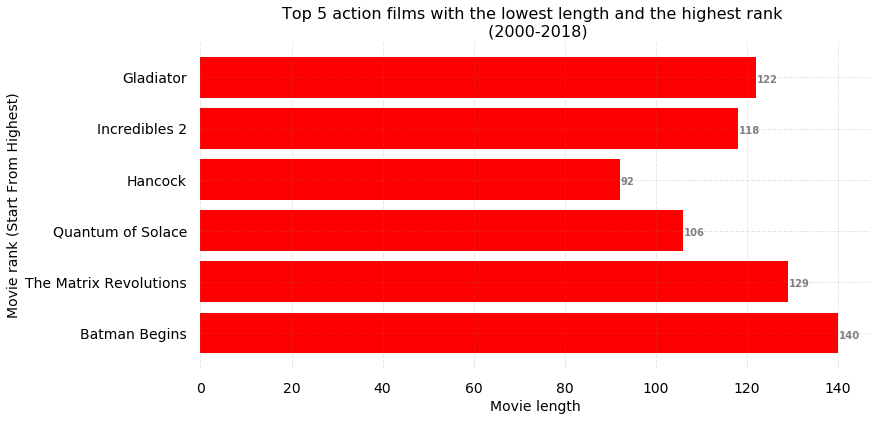

In [1593]:
fig, ax = plt.subplots(figsize =(12, 6))

ax.barh(dataQ1.title, dataQ1.length, color='red')
 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.4)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax.set_title("Top 5 action films with the lowest length and the highest rank \n (2000-2018)", loc ='center', fontsize=16 )
ax.set_xlabel('Movie length')
ax.set_ylabel('Movie rank (Start From Highest)')
plt.show()

### 2. From 2000-2018, what type of films has the lowest lenghth and the highest rank in a year ?

In [1431]:
dataQ2F = data[(data['year']>=2000)]
dataQ2F.head()

,Main_Genre,Genre_2,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700.059566,2018
1,Action,Adventure,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678.815482,2018
2,Animation,Action,7.8,118,3,PG,Pixar,Incredibles 2,608.581744,2018
3,Action,Adventure,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416.769345,2018
4,Action,Comedy,7.8,119,5,R,20th Century Fox,Deadpool 2,318.491426,2018


In [1432]:
dataQ2=dataQ2F.groupby(['Main_Genre'])[['length','rank_in_year' ]].min()
dataQ2

,length,rank_in_year
Main_Genre,,
Action,103,1
Adventure,106,2
Animation,82,2
Comedy,81,1
Crime,120,6
Drama,130,1
Family,150,10
Fantasy,88,1
History,154,6


In [1433]:
dataQ2=dataQ2.sort_values(["length"], ascending=True)

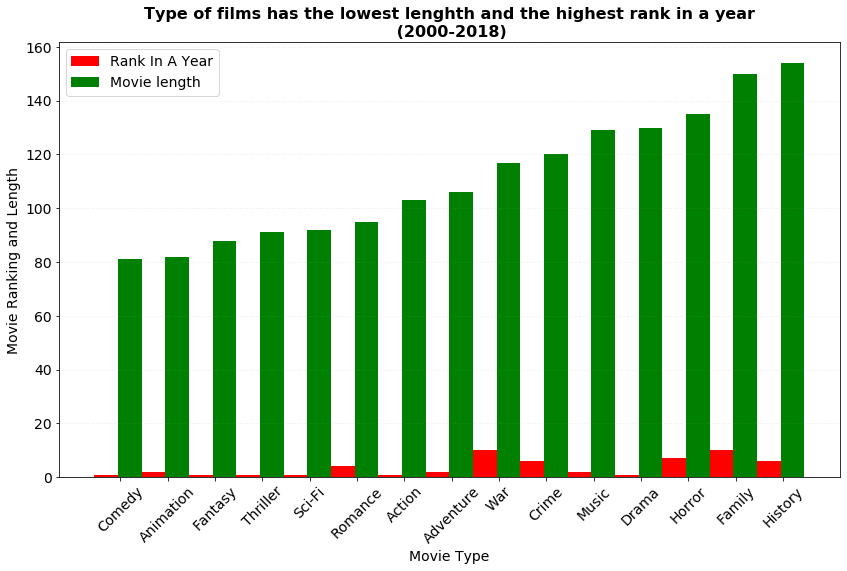

In [1434]:
plt.figure(figsize = (14,8))
plt.rc('font', size = 14)
plt.rc('axes', titlesize = 16)
plt.rc('axes', labelsize = 14)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.rc('legend', fontsize = 14)

width =0.5
a = np.arange(len(dataQ2.index))

x_labels = dataQ2.index
plt.bar(a, dataQ2.rank_in_year, width, color='red',  label = 'Rank In A Year')
plt.bar(a+ width,dataQ2.length, width, color='green', label = 'Movie length')
plt.xticks(a+0.3, x_labels, rotation = 45)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.10)
plt.legend(loc = 'upper left')
plt.title('Type of films has the lowest lenghth and the highest rank in a year\n (2000-2018)', loc ='center',fontweight ='bold')
plt.xlabel('Movie Type')
plt.ylabel('Movie Ranking and Length')
plt.legend()
plt.show()

### 3. What film studios  had the most benifit  from the top 5 higher rating  films from 2010-2018?

In [1435]:
dataQ3F = data[(data['year']>2010)]
dataQ3F.head()

,Main_Genre,Genre_2,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700.059566,2018
1,Action,Adventure,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678.815482,2018
2,Animation,Action,7.8,118,3,PG,Pixar,Incredibles 2,608.581744,2018
3,Action,Adventure,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416.769345,2018
4,Action,Comedy,7.8,119,5,R,20th Century Fox,Deadpool 2,318.491426,2018


In [1436]:
dataQ3 = dataQ3F.groupby(['studio'])[['imdb_rating','worldwide_gross']].max().sort_values(['worldwide_gross'], ascending=False)
dataQ3

,imdb_rating,worldwide_gross
studio,,
Walt Disney Pictures,8.5,1518.594910
Warner Bros,8.5,1341.511219
Paramount Pictures,8.7,1123.794079
Metro-Goldwyn-Mayer,7.8,1108.561013
Universal Pictures,7.5,970.761885
20th Century Fox,8.1,877.244782
Lionsgate Films,7.7,864.912963
Columbia Pictures,7.1,757.930663
Pixar,8.2,608.581744


In [1584]:
dataQ3 =dataQ3.head(5)
dataQ3

,imdb_rating,worldwide_gross
studio,,
Walt Disney Pictures,8.5,1518.594910
Warner Bros,8.5,1341.511219
Paramount Pictures,8.7,1123.794079
Metro-Goldwyn-Mayer,7.8,1108.561013
Universal Pictures,7.5,970.761885


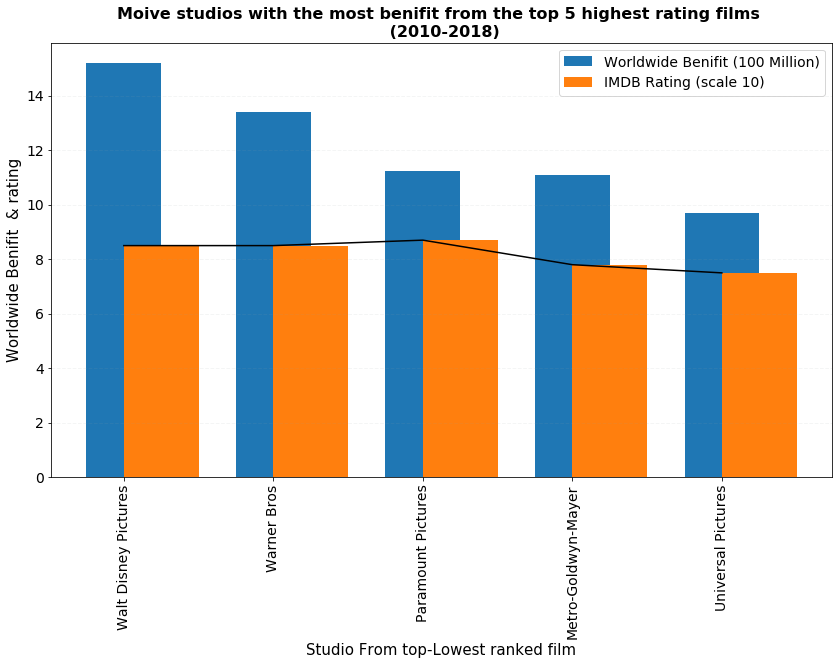

In [1588]:
barWidth = 0.25
fig = plt.subplots(figsize =(14, 8))

br1 = np.arange(len(dataQ3.index))
br2 = [x + barWidth for x in br1]

plt.bar(br1, dataQ3.worldwide_gross/100, width,  label = 'Worldwide Benifit (100 Million)')    #worldwide_gross/100 as 100 million
plt.bar(br2, dataQ3.imdb_rating, width,  label = 'IMDB Rating (scale 10)')

plt.title('Moive studios with the most benifit from the top 5 highest rating films \n (2010-2018)',loc ='center', fontweight ='bold')
plt.xlabel('Studio From top-Lowest ranked film', fontsize = 15)
plt.ylabel('Worldwide Benifit  & rating', fontsize = 15)
plt.xticks(br1, dataQ3.index, rotation = 90)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.10)
plt.plot(dataQ3.imdb_rating, color = "black")
plt.legend()
plt.savefig('studio_benifit_5high_rt_films.jpg')
plt.show()


### 4. How is the profit of only the Universal Pictures's  Adventure films 1975-2018 among the Top10Grossing Films?

In [1589]:
dataQ4F = data[(data['studio']=="Universal Pictures") & (data['Genre_2']=="Adventure")]
dataQ4F.head(2)

,Main_Genre,Genre_2,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
3,Action,Adventure,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416.769345,2018
31,Action,Adventure,7.0,123,2,PG-13,Universal Pictures,Jurassic World,652.270625,2015


In [1590]:
dataQ4= dataQ4F.groupby(['year'])[['worldwide_gross','length' ]].max()
dataQ4.head()

,worldwide_gross,length
year,,
1995,264.218220,135
1997,618.638999,129
1999,415.933406,125
2001,433.013274,130
2015,652.270625,140


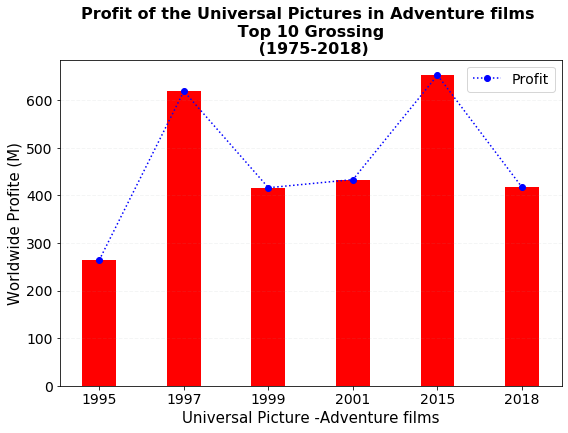

In [1598]:
plt.figure(figsize = (9,6))
plt.rc('font', size = 14)
plt.rc('axes', titlesize = 16)
plt.rc('axes', labelsize = 14)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.rc('legend', fontsize = 14)

a = np.arange(len(dataQ4.index))
x_labels = dataQ4.index

plt.bar(a, dataQ4.worldwide_gross, w, color = 'red')
plt.title('Profit of the Universal Pictures in Adventure films \n Top 10 Grossing \n (1975-2018)',loc ='center', fontweight ='bold')
plt.xlabel('Universal Picture -Adventure films', fontsize = 15)
plt.ylabel('Worldwide Profite (M)', fontsize = 15)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.10)
plt.xticks(a, dataQ4.index)

plt.plot(a, dataQ4.worldwide_gross, 'bo', linestyle = 'dotted', label='Profit')
plt.legend()

plt.show()


### 5. What are top 10 fim genre that had the most films among the top 10 ranked from 1975 - 2018

In [1613]:
dataQ5=data.groupby(['studio'])[['title']].count().sort_values(['title'], ascending=)
dataQ5

TypeError: 'DataFrame' object is not callable

In [1614]:
dataQ5 = dataQ5F.tail(10)
dataQ5

,title
Genre_2,
Fantasy,8
Sci-Fi,9
Mystery,9
Crime,19
Family,20
Animation,28
Action,29
Comedy,66
Drama,67


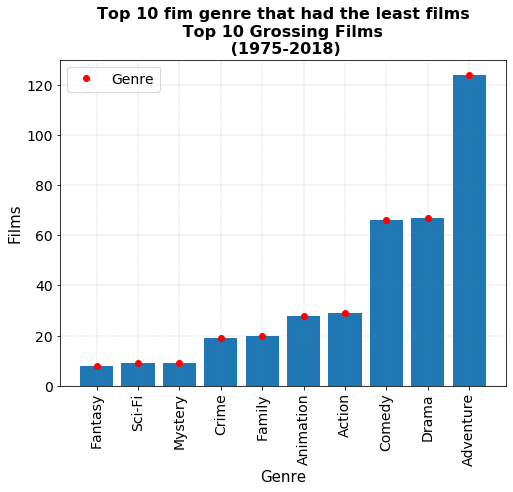

In [1618]:
plt.figure(figsize = (8,6))

s = np.arange(len(dataQ5.index))
x_labels = dataQ5.index

plt.bar(s, dataQ5.title)
plt.plot(dataQ5,'ro', label='Genre')
plt.title('Top 10 fim genre that had the least films\n Top 10 Grossing Films \n (1975-2018)',loc ='center', fontweight ='bold')
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Films', fontsize = 15)
plt.xticks(s, dataQ5.index, rotation=90)
plt.grid(color = 'gray', linestyle = ':', linewidth = 0.4)
plt.legend()
plt.show()


### 6. which studios had the most profit from Sci-Fi movies with imdb_rating of higher than 6 ?

In [1556]:
dataQ6F = data[(data['imdb_rating']>6) & (data['Main_Genre']=='Sci-Fi')]
dataQ6F.head()

,Main_Genre,Genre_2,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
37,Sci-Fi,Fantasy,8.0,164,8,PG-13,20th Century Fox,The Martian,228.433663,2015
42,Sci-Fi,Adventure,8.1,121,3,PG-13,Walt Disney Pictures,Guardians of the Galaxy,774.176600,2014
44,Sci-Fi,Adventure,6.8,123,5,PG-13,Lionsgate Films,The Hunger Games: Mockingjay - Part 1,752.100229,2014
45,Sci-Fi,Adventure,8.1,131,6,PG-13,20th Century Fox,X-Men: Days of Future Past,748.121534,2014
46,Sci-Fi,Adventure,7.8,136,7,PG-13,Walt Disney Pictures,Captain America: The Winter Soldier,714.766572,2014


In [1580]:
dataQ6 = dataQ6F.groupby(['studio'])[['worldwide_gross', 'imdb_rating']].max().sort_values(['worldwide_gross'], ascending=False)
dataQ6 

,worldwide_gross,imdb_rating
studio,,
Walt Disney Pictures,1518.594910,8.2
Paramount Pictures,1123.794079,8.7
Warner Bros,825.531030,8.8
20th Century Fox,817.400891,8.5
Lionsgate Films,752.100229,7.3
DreamWorks,709.709780,7.7
Columbia Pictures,624.026776,7.7
Universal Pictures,618.638999,7.9
Sony Pictures,519.843345,8.5


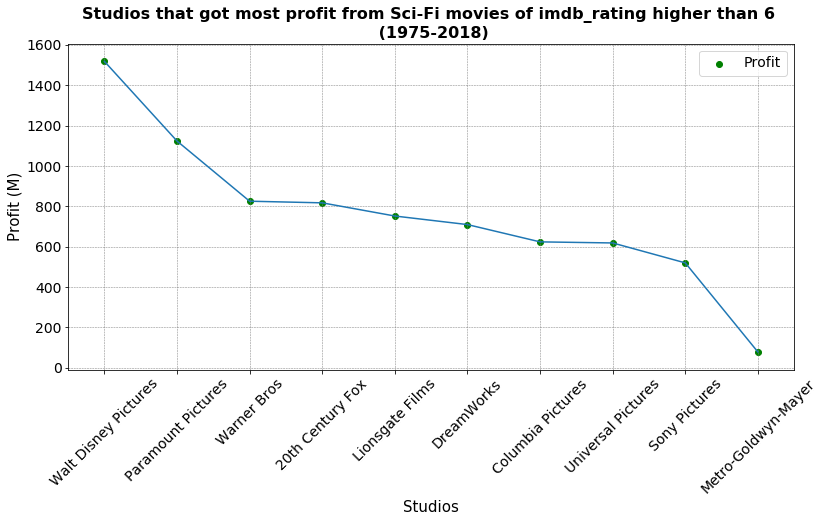

In [1581]:
plt.figure(figsize = (20, 8))

r = np.arange(len(dataQ5.index))
x_labels = dataQ5.index

plt.plot(dataQ6.worldwide_gross)
plt.scatter(r, dataQ5.worldwide_gross, label='Profit', color= 'green')
plt.xticks(r, dataQ5.index, rotation =45)
plt.title('Studios that got most profit from Sci-Fi movies of imdb_rating higher than 6 \n (1975-2018)',loc ='center', fontweight ='bold')
plt.xlabel('Studios', fontsize = 15)
plt.ylabel('Profit (M)', fontsize = 15)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

### END Thanks